In [ ]:
pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 30.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bbed9db1d648e51f7bcfc9beccb85c32537377bd511802b05148c74cfc1e7c67
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_

In [ ]:
!pip install pandas_profiling

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
# Importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#from pandas_profiling import ProfileReport

#import ydata_profiling
import tensorflow as tf


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Input, Embedding,LSTM,Dropout,Conv1D, MaxPooling1D, GlobalMaxPooling1D,Dropout,Bidirectional,Flatten,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
# Importing the NLTK library
import nltk

#nltk.download('omw-1.4')
# # downloading vader lexicon
# nltk.download('vader_lexicon')

from nltk.corpus import stopwords

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Used in Stemming
from nltk.stem.porter import PorterStemmer


# Used in Lemmatization
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Importing the Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [ ]:
mt = pd.read_csv('/content/drive/MyDrive/BBNaija_2021.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mt.head(15)

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:15:09,This is coming after Pere and Angel who were a...,NaN,https://www.twitter.com/user/status/1442462817...,0,3,24.42
1,Mufunwa ⚓️ 🌞,@MufunwaV,27/9/2021 12:14:45,Not gonna lie big brother messed up with what ...,NaN,https://www.twitter.com/user/status/1442462715...,0,3,0.82
2,Father figure 🇿🇦💟,@nathynice,27/9/2021 12:14:23,Production team doesn't care a bit about these...,NaN,https://www.twitter.com/user/status/1442462621...,1,8,1.55
3,CARL (MIKASHITA) 🔰,@Backupforcarl,27/9/2021 12:13:31,Kayode is the one responsible for this show be...,NaN,https://www.twitter.com/user/status/1442462404...,0,5,0.91
4,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:12:52,VIDEO: Pere's fans protest BBNaija’s evictio...,NaN,https://www.twitter.com/user/status/1442462240...,0,2,101.75
5,David,@Cas_TrippleD,27/9/2021 12:12:32,"Even if Angel was later evicted this evening, ...",NaN,https://www.twitter.com/user/status/1442462154...,0,10,0.82
6,#OccupyJulorbiHouse,@Thejamyla,27/9/2021 12:10:48,I don’t want to see any hot takes on “wild car...,NaN,https://www.twitter.com/user/status/1442461722...,2,17,1.88
7,Well-Meaning NIGERIAN™,@a_little_god_,27/9/2021 12:10:24,"This #BBNaija people just have coconut heard, ...",NaN,https://www.twitter.com/user/status/1442461619...,0,2,83.74
8,Id_JACK,@Idjack12,27/9/2021 12:09:39,3 Top SEO Guidelines To Search Engine Marketin...,NaN,https://www.twitter.com/user/status/1442461431...,1,0,3.89
9,OG EMMY,@ogemmyofficial,27/9/2021 12:07:35,https://t.co/wYRRAyMRMj #sippingremy #wizkidfc...,NaN,https://www.twitter.com/user/status/1442460912...,0,0,4.14


In [ ]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User           10000 non-null  object 
 1   Username       10000 non-null  object 
 2   UTC Date       10000 non-null  object 
 3   Tweet          10000 non-null  object 
 4   Binders        0 non-null      float64
 5   Permalink      10000 non-null  object 
 6   Retweet count  10000 non-null  int64  
 7   Likes count    10000 non-null  int64  
 8   Tweet value    10000 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [ ]:
mt.tail(10)

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
9990,Hakunamata💡,@hyperopique,22/9/2021 1:17:13,Big Brother was supposed to ask all housemates...,NaN,https://www.twitter.com/user/status/1440485300...,0,7,5.73
9991,Stella,@stellabuz,22/9/2021 1:17:03,Saga says Biggie should give them a clarity. S...,NaN,https://www.twitter.com/user/status/1440485259...,0,6,1.20
9992,Tebo_K 🦋,@SimplyTebo_K,22/9/2021 1:16:17,Only my SA people will understand that biggie ...,NaN,https://www.twitter.com/user/status/1440485065...,7,33,1.33
9993,Peter Obi’s Glasses,@devikaokuns,22/9/2021 1:16:02,Pere bringing pillow and duvet 😂😂.. angel alre...,NaN,https://www.twitter.com/user/status/1440485001...,0,6,0.77
9994,HERMES' SMILE🥰🪐,@dede_abaiki,22/9/2021 1:15:59,Saga will vex and end up telling Biggie his mi...,NaN,https://www.twitter.com/user/status/1440484989...,0,0,5.22
9995,𝗧𝗵𝗲 𝗔𝗻𝗴𝗲𝗹 𝗝𝗯𝘀𝗺𝗶𝘁𝗵,@theangeljbsmith,22/9/2021 1:15:13,When I catch any Archangel up and not voting 🙂...,NaN,https://www.twitter.com/user/status/1440484797...,83,292,450.78
9996,xolly Mnyandu,@XollyMnyandu,22/9/2021 1:14:54,From Frodd &gt;&gt; Ozo &gt;&gt; Saga \n\n🙅‍♀️...,NaN,https://www.twitter.com/user/status/1440484717...,0,7,68.62
9997,BILLIONAIRE IN THE MAKING,@Iamrichestrich7,22/9/2021 1:13:38,"Don’t HATE the player, HATE the GAME\n\n#Bbnai...",NaN,https://www.twitter.com/user/status/1440484399...,0,1,10.83
9998,Oluwaseun Akinjiyan,@OluwaseunAkinj1,22/9/2021 1:13:28,Emmanuel diary session(3\n#BBNaija\n#BBNaijaSe...,NaN,https://www.twitter.com/user/status/1440484357...,0,4,3.94
9999,xolly Mnyandu,@XollyMnyandu,22/9/2021 1:12:54,So Men are quite 😂😂\n\nBiko tell us what's you...,NaN,https://www.twitter.com/user/status/1440484213...,0,3,68.62


In [ ]:
mt.shape

(10000, 9)

In [ ]:
#profile = ProfileReport(mt)
#profile

In [ ]:
mt = mt.drop('Binders',axis =1)

In [ ]:
mt.isnull().sum()

User             0
Username         0
UTC Date         0
Tweet            0
Permalink        0
Retweet count    0
Likes count      0
Tweet value      0
dtype: int64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129409 (\N{LION FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128103 (\N{GIRL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127998 (\N{EMOJI MODIFIER FITZPATRICK TYPE-5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129322 (\N{GRINNING FACE WITH ONE LARGE AND ONE SMALL EYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128158 (\N{REVOLVING HEARTS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3

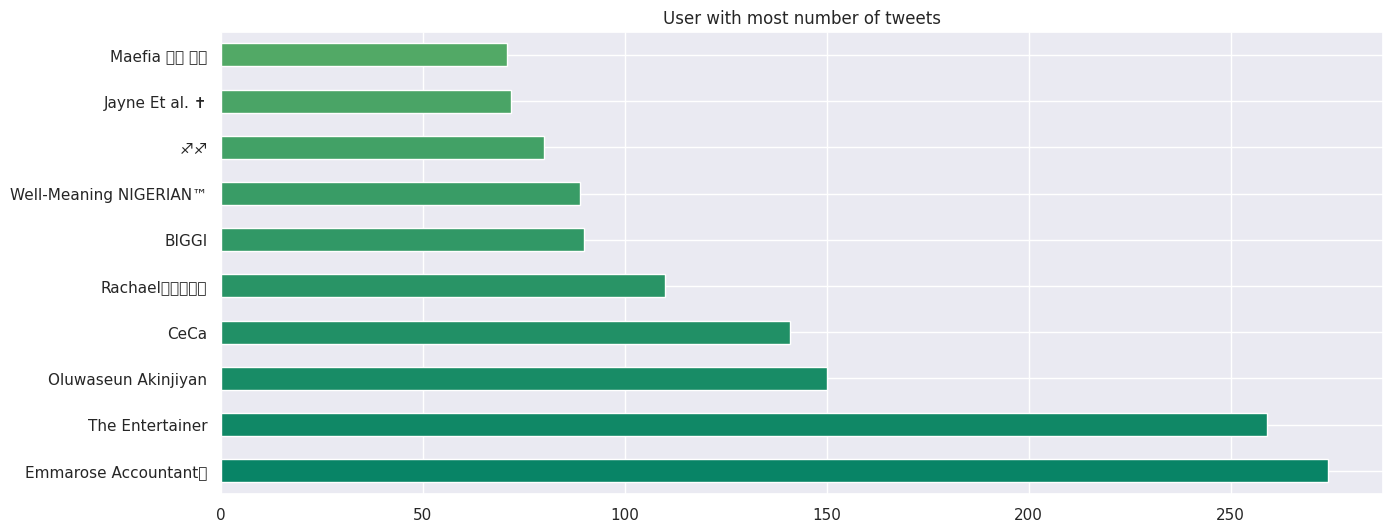

In [ ]:
%matplotlib inline
plt.figure(figsize=(15,6))
mt['User'].value_counts()[:10].plot(kind='barh', color=sns.color_palette('summer', 30))
plt.title('User with most number of tweets')
plt.show()

In [ ]:
pat1 =  r'@[A-Za-z0-9]+'
pat2 =  r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
pat3 = r'[^a-zA-Z]'
combined_pat2 = r'|'.join((combined_pat,pat3))

In [ ]:
len(mt['Tweet'])

10000

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
nltk.download('stopwords')
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

cleaned_tweets = []

for i in range(0, len(mt['Tweet'])) :
    tweets = re.sub(combined_pat2,' ',mt['Tweet'][i])
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [ps.stem(word) for word in tweets if not word in set(stopwords.words('english'))]
    tweets = ' '.join(tweets)
    cleaned_tweets.append(tweets)

In [ ]:
#converting text to lowercase
tweets.lower()

'men quit biko tell us brother saga tht yull teach man confer bbnaija bbnaijashineyaey'

In [ ]:
#splits the sentence by each word
tweets.split()

['men',
 'quit',
 'biko',
 'tell',
 'us',
 'brother',
 'saga',
 'tht',
 'yull',
 'teach',
 'man',
 'confer',
 'bbnaija',
 'bbnaijashineyaey']

In [ ]:
#converts the words to lowest degree and we also remove all the stopwords from the text (for example: this, that, etc)
ps.stem(tweets)

'men quit biko tell us brother saga tht yull teach man confer bbnaija bbnaijashineyaey'

In [ ]:
cleaned_tweets[:10]

['come pere angel ask leav hous sunday live evict show move white room bbnaija bbnaija pere thewhistlerng biggi',
 'gonna lie big brother mess pere fair even fan bbnaija bbnaijashineyaey bbnaija',
 'product team care bit peopl mental health sad begin imagin go head right pere militari angel alreadi battl anxieti bbnaija justiceforper bbnaijashineyaey',
 'kayod one respons show bore hm bbnaija bbnaijashineyaey',
 'video pere fan protest bbnaija evict twist lago bbnaija bbnaija pere thewhistlerng biggi',
 'even angel later evict even still unfair babe fan suspens exercis mental drain stakehold either way twist emot tortur bbnaija bbnaijashineyaey bbnaija',
 'want see hot take wild card gullibl complet disrespect everyon vote tirelessli keep pere hous told us vote count bbnaija justiceforper bbnaija',
 'bbnaija peopl coconut heard hear word kept say yey twist need known better especi go contradict viewer vote pere issu mess bbnaija bbnajia bbnaijashineyaey',
 'top seo guidelin search engi

In [ ]:
mt.columns

Index(['User', 'Username', 'UTC Date', 'Tweet', 'Permalink', 'Retweet count',
       'Likes count', 'Tweet value'],
      dtype='object')

In [ ]:
mt['cleaned_tweets'] = cleaned_tweets

In [ ]:
def findpolarity(data):
    sid = SentimentIntensityAnalyzer()
    polarity = sid.polarity_scores(data)
    if(polarity['compound'] >= 0.2):
        sentiment = 1
    if(polarity['compound'] <= -0.2):
        sentiment = -1
    if(polarity['compound'] < 0.2 and polarity['compound'] >-0.2):
        sentiment = 0
    return(sentiment)

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
findpolarity(cleaned_tweets[0])

0

In [ ]:
sentiment = []
for i in range(0, len(cleaned_tweets)):
    s = findpolarity(cleaned_tweets[i])
    sentiment.append(s)

In [ ]:
len(cleaned_tweets)

10000

In [ ]:
tweet_sentiment = pd.DataFrame()
tweet_sentiment['cleaned_tweets'] = cleaned_tweets
tweet_sentiment['sentiment'] = sentiment

In [ ]:
tweet_sentiment.to_csv('tweet_sentiment.csv', index=False)

In [ ]:
tweet_sentiment.shape[0]

10000

To assign columns to create different sentiments

In [ ]:
positive_tweet = []
negative_tweet = []
neutral_tweet = []

for i in range(0, tweet_sentiment.shape[0]):
    if tweet_sentiment['sentiment'][i] == 1:
        positive_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == 0:
        neutral_tweet.append(tweet_sentiment['cleaned_tweets'][i])
    elif tweet_sentiment['sentiment'][i] == -1:
        negative_tweet.append(tweet_sentiment['cleaned_tweets'][i])

In [ ]:
positive_tweet[:10]

['gonna lie big brother mess pere fair even fan bbnaija bbnaijashineyaey bbnaija',
 'top seo guidelin search engin market via seo bbnaija searchengin marketingtip businessmind bbnaija smartbusi',
 'tribal got pere issu emma win veto save peopl got pere issu peopl act like mad dog sha bbnaija bbnaijashineyaey bbnaija',
 'next good number liquoros fan divid vote emmanuel ofcu lover split vote leav us emerg forc pere would dust bbnaijia bbnaija bbnaijashineyaey',
 'top place promot busi free busi bbnaija digitalmarket internet lalisa btw kingkohli bbnaija bbnaijashineyaey joshuausyk lalisaloveblink bbnaijia',
 'goosebump meeerrhhh reason support one bottl let go lion voteliquoros bbnaija bbnaijashineyaey million',
 'favorit come show look good win bbnaija bbnaija emmaros',
 'cross orat like explain thing detail omo lol bbnaija bbnaijaseason',
 'pere make biggi ebuka trend pere everyth work togeth good justiceforper bbnaija bbnaija bbnaijashineyourey',
 'make emmanuel win make everybodi re

In [ ]:
negative_tweet[:10]

['kayod one respons show bore hm bbnaija bbnaijashineyaey',
 'even angel later evict even still unfair babe fan suspens exercis mental drain stakehold either way twist emot tortur bbnaija bbnaijashineyaey bbnaija',
 'want see hot take wild card gullibl complet disrespect everyon vote tirelessli keep pere hous told us vote count bbnaija justiceforper bbnaija',
 'bbnaija peopl coconut heard hear word kept say yey twist need known better especi go contradict viewer vote pere issu mess bbnaija bbnajia bbnaijashineyaey',
 'omoh pere fan una dey vex sha make una calm see plot twist goe una go wage war whole bbnaija na nawaoooo evict fake make una wait see happen next abeg bbnaijia ebuka bbnaija',
 'angel suffer biggi decis pleas let back even pere alon long continu hate stop tire offici tire bbnaija bbnaijashineyaey bbnajia',
 'call patriot street protest jobless u job werey go mind busi bbnaija bbnaija justiceforper',
 'app humbl cancel twist send pere back hous spoil final justiceforper bb

In [ ]:
neutral_tweet[:10]

['come pere angel ask leav hous sunday live evict show move white room bbnaija bbnaija pere thewhistlerng biggi',
 'product team care bit peopl mental health sad begin imagin go head right pere militari angel alreadi battl anxieti bbnaija justiceforper bbnaijashineyaey',
 'video pere fan protest bbnaija evict twist lago bbnaija bbnaija pere thewhistlerng biggi',
 'sippingremi wizkidfc bbnaija bbnaijashineyaey newmusicalert clubhous wizkid davido rema donjazzi drake jcole',
 'audac continu nonsens twist today pm bbnaija bbnaijashineyaey bbnaija',
 'biggi probabl use us guy cruis game controversi need game keep trend pere must evict bbnaija bbnaijashineyaey',
 'bbnaija pere emmaros bbnaija liquoros whitemoney emmanuel cross biggi angel ebuka live stream big brother naija',
 'bbnaija pere fan stage protest amid final game twist pulsebbnaija bbnaija bbnaijashineyaey',
 'bbnaija bbnaija justiceforper',
 'fan pere housem ongo take street protest unfair decis housem big brother term twist eve

In [ ]:
len(positive_tweet)

3746

In [ ]:
len(negative_tweet)

1761

In [ ]:
len(neutral_tweet)

4493

In [ ]:
# Reading the tweet sentiment
ts = pd.read_csv('tweet_sentiment.csv')
ts.head()

,cleaned_tweets,sentiment
0,come pere angel ask leav hous sunday live evic...,0
1,gonna lie big brother mess pere fair even fan ...,1
2,product team care bit peopl mental health sad ...,0
3,kayod one respons show bore hm bbnaija bbnaija...,-1
4,video pere fan protest bbnaija evict twist lag...,0


In [ ]:
ts.shape

(10000, 2)

In [ ]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   cleaned_tweets  10000 non-null  object
 1   sentiment       10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [ ]:
ts.describe()

,sentiment
count,10000.000000
mean,0.198500
std,0.715087
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


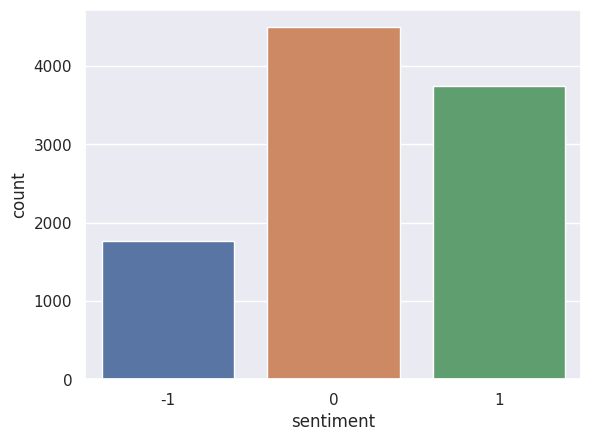

In [ ]:
#Plot the count for the sentiment
%matplotlib inline
sns.countplot(x = ts['sentiment'])
plt.show()

In [ ]:
x = ts['cleaned_tweets']

In [ ]:
y = ts['sentiment']

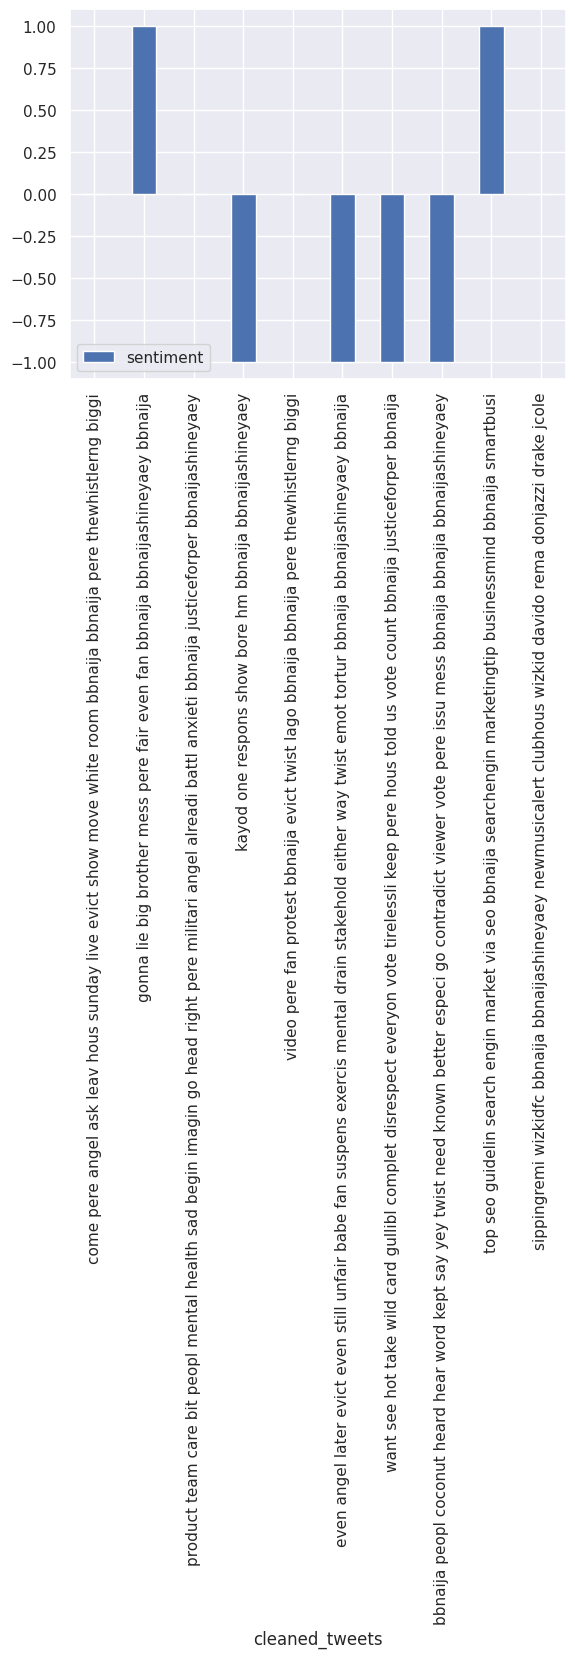

In [ ]:
ts[:10].plot(x ="cleaned_tweets", y = "sentiment", kind = "bar")

plt.show()


In [ ]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')




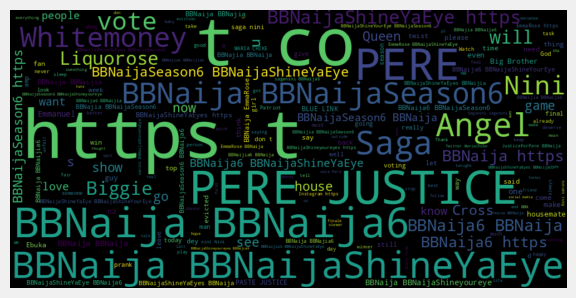

In [ ]:
Tweet_Word =''.join(  [twts for twts in mt['Tweet']] )#To join all tweet
wc = WordCloud(
    background_color = "black",
    #stopwords = stopwords,
    height = 500,
    width = 1000,
    random_state =42,
    max_font_size =120
)
wc.generate(Tweet_Word)

plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()


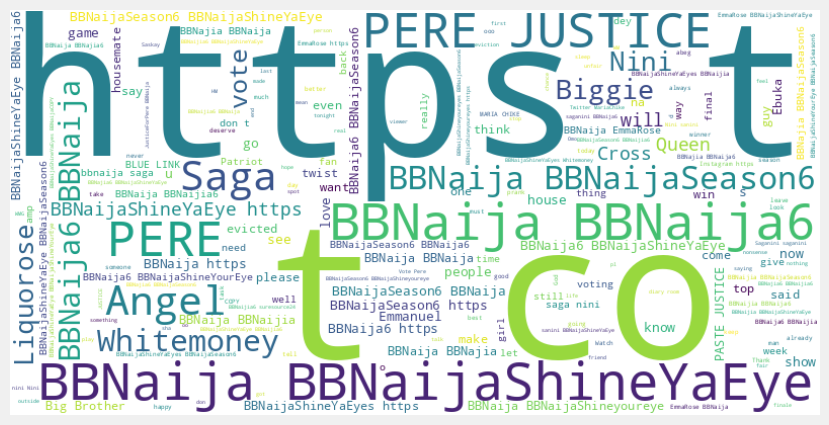

In [ ]:
# Extract the 'Text' column
text_column = mt['Tweet']

# Join the text from all rows
all_text = ' '.join(text_column)

# Create a WordCloud object with optional configurations (e.g., stopwords, background color, etc.)
wordcloud = WordCloud(
    stopwords=None,  # You can provide your own list of stopwords here if needed
    background_color='white',
    width=800,
    height=400,
).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()


In [ ]:
from textblob import TextBlob

# Assuming your data is in a DataFrame called 'data'
# Replace 'data' with the actual variable name you have

# Define a function to determine sentiment using TextBlob
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis to the 'Text' column and create a new 'Sentiment' column
mt['Sentiment'] = mt['Tweet'].apply(get_sentiment)

# Filter the DataFrame for positive sentiment
positive_df = mt[mt['Sentiment'] == 'positive']

# Extract the 'Text' column from the filtered DataFrame
positive_text_column = positive_df['Tweet']

# Join the text from all rows with positive sentiment
positive_text = ' '.join(positive_text_column)

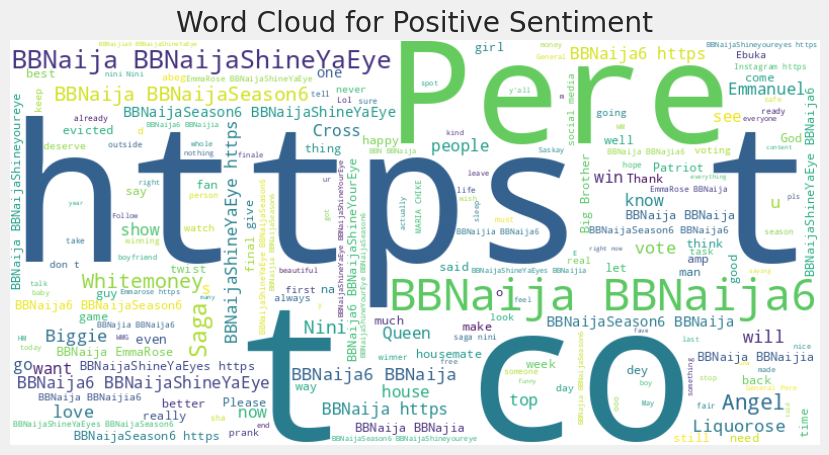

In [ ]:
# Create a WordCloud object with optional configurations (e.g., stopwords, background color, etc.)
wordcloud = WordCloud(
    stopwords=None,  # You can provide your own list of stopwords here if needed
    background_color='white',
    width=800,
    height=400,
).generate(positive_text)

# Display the word cloud for positive sentiment using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Positive Sentiment')
plt.show()

In [ ]:
# Filter the DataFrame for negative sentiment
negative_df = mt[mt['Sentiment'] == 'negative']

# Extract the 'Text' column from the filtered DataFrame
negative_text_column = negative_df['Tweet']

# Join the text from all rows with negative sentiment
negative_text = ' '.join(negative_text_column)

# Create a WordCloud object with optional configurations (e.g., stopwords, background color, etc.)
wordcloud = WordCloud(
    stopwords=None,  # You can provide your own list of stopwords here if needed
    background_color='white',
    width=800,
    height=400,
).generate(negative_text)

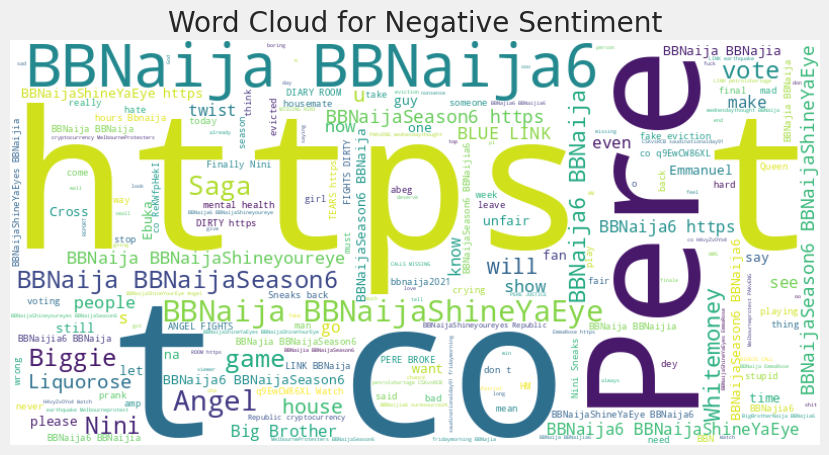

In [ ]:
# Display the word cloud for negative sentiment using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.title('Word Cloud for Negative Sentiment')
plt.show()

In [ ]:
# Check the labels

mt['Sentiment'].value_counts()

neutral     4094
positive    3785
negative    2121
Name: Sentiment, dtype: int64

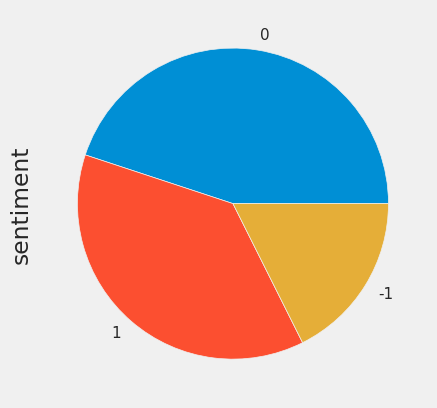

In [ ]:
ts["sentiment"].value_counts().plot(kind='pie')
plt.show()

In [ ]:
stopwords =STOPWORDS
print(stopwords)

{'once', 'on', "i'll", "she'd", 'ought', 'like', "how's", "they'd", 'you', "can't", 'www', "he'll", 'their', "he's", 'however', 'my', 'would', 'any', 'because', 'here', 'she', "weren't", 'doing', 'k', 'itself', 'com', 'has', "here's", 'what', 'those', "who's", 'could', "he'd", 'there', 'or', 'ours', 'how', 'him', "you'll", 'can', 'both', 'where', 'nor', "i've", 'same', "couldn't", 'no', 'in', "it's", 'of', 'why', 'again', 'at', 'ever', 'be', "hadn't", 'up', 'cannot', 'your', 'yours', 'further', 'these', "they'll", 'a', 'before', 'do', 'ourselves', 'which', "don't", 'about', 'did', 'our', 'i', 'then', 'such', 'her', 'and', 'does', 'me', 'other', 'also', 'some', 'but', "there's", "i'd", 'whom', 'by', "you've", "mustn't", 'than', 'therefore', 'more', 'over', "wasn't", 'it', 'if', "that's", "you're", 'http', 'under', 'against', "why's", "hasn't", "you'd", 'that', 'yourselves', 'most', 'being', 'with', "wouldn't", 'should', 'theirs', 'while', 'himself', 'through', 'were', "isn't", "aren't",

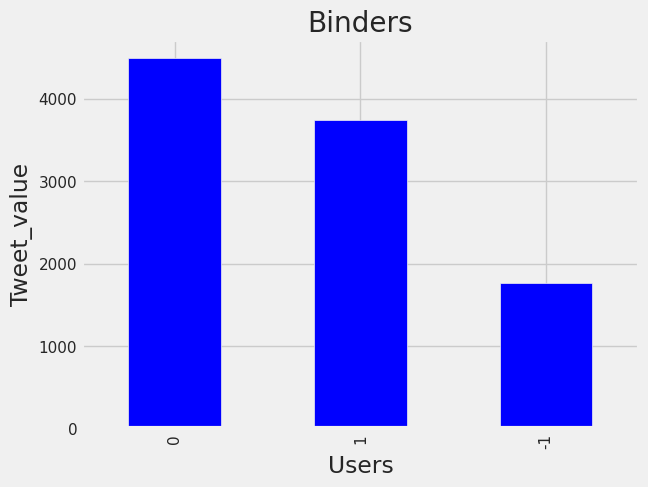

In [ ]:
plt.title("Binders")
plt.xlabel("Users")
plt.ylabel("Tweet_value")
ts["sentiment"].value_counts()[:20].plot(kind="bar", color="blue")
plt.show()

Test-Train split

In [ ]:
ts = ts['sentiment']


In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  fig , ax = plt.subplots(1,2,figsize = (10,5))

  ax[0].plot(epochRange,history.history['accuracy'],label = 'Training Accuracy')
  ax[0].plot(epochRange,history.history['val_accuracy'],label = 'Validation Accuracy')
  ax[0].set_title('Training and Validation accuracy')
  ax[0].set_xlabel('Epoch')
  ax[0].set_ylabel('Accuracy')
  ax[0].legend()
  ax[1].plot(epochRange,history.history['loss'],label = 'Training Loss')
  ax[1].plot(epochRange,history.history['val_loss'],label = 'Validation Loss')
  ax[1].set_title('Training and Validation loss')
  ax[1].set_xlabel('Epoch')
  ax[1].set_ylabel('Loss')
  ax[1].legend()
  fig.tight_layout()
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(ts,sentiment,test_size = 0.2, random_state = 42)

In [ ]:
#set up the tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

MAX_VOCAB_SIZE = 10000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token="<oov>")
tokenizer.fit_on_text(x_train)
word_index = tokenizer.word_index
# print(word_index)
V = len(word_index)
print("Vocabulary of the dataset is: ", V)

AttributeError: ignored

In [ ]:
seq_train = tokenizer.texts_to_sequences(x_train)
seq_test = tokenizer.texts_to_sequences(x_test)

AttributeError: ignored

In [ ]:
Splitting training set for validation purposes
Xtrain,Xval,ytrain,yval=train_test_split(pad_train,ytrain,
                                             test_size=0.2,random_state=10)

SyntaxError: ignored

In [ ]:
def lstm_model(Xtrain,Xval,ytrain,yval,V,D,maxlen,epochs):

    print("----Building the model----")
    i = Input(shape=(maxlen,))
    x = Embedding(V + 1, D,input_length = maxlen)(i)
    x = BatchNormalization()(x)
    x = Dropout(0.3)(x)
    x = Conv1D(32,5,activation = 'relu')(x)
    x = Dropout(0.3)(x)
    x = MaxPooling1D(2)(x)
    x = Bidirectional(LSTM(128,return_sequences=True))(x)
    x = LSTM(64)(x)
    x = Dropout(0.5)(x)
    x = Dense(1, activation='sigmoid')(x)
    model = Model(i, x)
    model.summary()

    #Training the LSTM
    print("----Training the network----")
    model.compile(optimizer= Adam(0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#     #early_stop = EarlyStopping(monitor='val_accuracy',
#                                mode='min',
#                                patience = 2 )
#     #checkpoints= ModelCheckpoint(filepath='./',
#                             monitor="val_accuracy",
#                             verbose=0,
#                             save_best_only=True
#                            )
  #  callbacks = [checkpoints,early_stop]
    r = model.fit(Xtrain,ytrain,
                  validation_data = (Xval,yval),
                  epochs = epochs,
                  verbose = 2,
                  batch_size = 32)
                  #callbacks = callbacks
    print("Train score:", model.evaluate(Xtrain,ytrain))
    print("Validation score:", model.evaluate(Xval,yval))
    n_epochs = len(r.history['loss'])

    return r,model,n_epochs
D = 64 #embedding dims

In [ ]:
D = 64 #embedding dims
epochs = 5
r,model,n_epochs = lstm_model(x_train,Xval,ytrain,yval,V,D,max_seq_len,epochs)

NameError: ignored

# PROCESSING DATA

In [ ]:
%matplotlib inline
from textblob import TextBlob, Word
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)







In [ ]:
import csv
import pandas as pd
with open('/content/drive/MyDrive/BBNaija_2021.csv') as f:
  reader = csv.reader(f)
  result = list(reader)

result = result[0]
result

['\ufeffUser',
 'Username',
 'UTC Date',
 'Tweet',
 'Binders',
 'Permalink',
 'Retweet count',
 'Likes count',
 'Tweet value']

In [ ]:
# Check sentiment polarity of each sentence.
sentiment_scores = list()
i = 0
for sentence in result:
    line = TextBlob(sentence)
    sentiment_scores.append(line.sentiment.polarity)
    if(i <= 10):
        print(sentence + ": POLARITY=" + str(line.sentiment.polarity))
        i += 1

﻿User: POLARITY=0.0
Username: POLARITY=0.0
UTC Date: POLARITY=0.0
Tweet: POLARITY=0.0
Binders: POLARITY=0.0
Permalink: POLARITY=0.0
Retweet count: POLARITY=0.0
Likes count: POLARITY=0.0
Tweet value: POLARITY=0.0


<ipython-input-89-f2767477e38a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentiment_scores)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: ylabel='Density'>

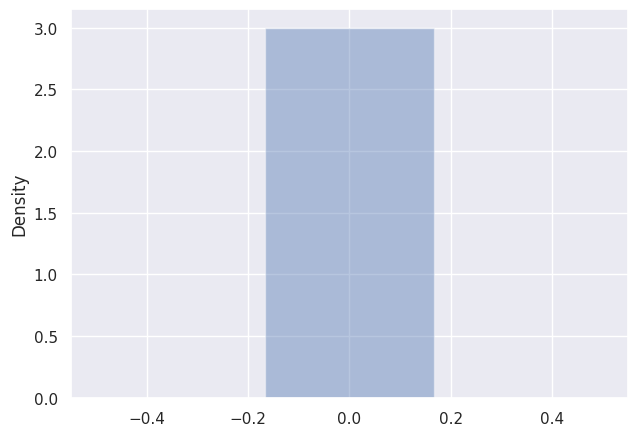

In [ ]:
sns.distplot(sentiment_scores)

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [ ]:
# Convert array of comments into a single string
comments = TextBlob(' '.join(result))
# Check out noun phrases, will be useful for frequent feature extraction
comments.noun_phrases

In [ ]:
# Select frequent feature threshold as (max_count)/100
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:5]
frequent_features

In [ ]:
# Select frequent feature threshold as (max_count)/100
# This is an arbitrary decision as of now.
counts = list(feature_count.values())
features = list(feature_count.keys())
threshold = len(comments.noun_phrases)/100
#threshold=66

print("Threshold:" + str(threshold))

frequent_features = list()

for feature, count in feature_count.items():
    if count >= threshold:
        frequent_features.append(feature)
print(' Features:')
frequent_features=frequent_features[0:5]
frequent_features

In [ ]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer

    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)

In [ ]:
def nltk_sentiment(sentence):
    from nltk.sentiment.vader import SentimentIntensityAnalyzer

    nltk_sentiment = SentimentIntensityAnalyzer()
    score = nltk_sentiment.polarity_scores(sentence)
    return score
#b=dataset.values.T.tolist()
#print(b)
nltk_results = [nltk_sentiment(row) for row in frequent_features]
#print(nltk_results)
results_df = pd.DataFrame(nltk_results)
#print(results_df)
text_df = pd.DataFrame(frequent_features)
#print(text_df)
nltk_df = text_df.join(results_df)
#nltk_df1=nltk_df[[0,'neu']]
#print(nltk_df)

In [ ]:
nltk_df.head(5)

In [ ]:
newdf=nltk_df[0]
newdf=pd.DataFrame({'features':nltk_df[0],'pos':nltk_df['pos'],'neg':nltk_df['neg']})
newdf.pos=newdf.pos+0.2
newdf.neg=newdf.neg-0.2
newdf

SENTENCE EMBEDDING

In [ ]:
# !pip install sentence-transformers


In [ ]:
#! pip install from sentence_transformers import SentenceTransformer
import tensorflow as tf

In [ ]:
#! pip install from sentence_transformers import SentenceTransformer
#! pip install SentenceTransformer
def embedding(model, model_type, sentences):
    if model_type == 'use':
        embeddings = model.encode(sentences)
    elif model_type == 'sentence transformer':
        embeddings = model.encode(sentences)
    return embeddings

# Create a SentenceTransformer model
model_st1 = SentenceTransformer('paraphrase-MiniLM-L6-v2', device='cpu')
# Generate embeddings
embeddings_st1 = embedding(model_st1, 'sentence transformer', all_intents)


NameError: ignored

In [ ]:
try:
    # Generate embeddings
    embeddings_st1 = model_st1.encode(all_intents)

    if embeddings_st1 is not None:
        print(f"Embeddings shape: {embeddings_st1.shape}")
    else:
        print("Embeddings could not be generated.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

An error occurred: name 'model_st1' is not defined


In [ ]:
embeddings_st1.shape

NameError: ignored

TF-IDF

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import word2vec
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
dd = pd.read_csv('/content/drive/MyDrive/BBNaija_2021.csv')

dd.head()

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:15:09,This is coming after Pere and Angel who were a...,NaN,https://www.twitter.com/user/status/1442462817...,0,3,24.42
1,Mufunwa ⚓️ 🌞,@MufunwaV,27/9/2021 12:14:45,Not gonna lie big brother messed up with what ...,NaN,https://www.twitter.com/user/status/1442462715...,0,3,0.82
2,Father figure 🇿🇦💟,@nathynice,27/9/2021 12:14:23,Production team doesn't care a bit about these...,NaN,https://www.twitter.com/user/status/1442462621...,1,8,1.55
3,CARL (MIKASHITA) 🔰,@Backupforcarl,27/9/2021 12:13:31,Kayode is the one responsible for this show be...,NaN,https://www.twitter.com/user/status/1442462404...,0,5,0.91
4,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:12:52,VIDEO: Pere's fans protest BBNaija’s evictio...,NaN,https://www.twitter.com/user/status/1442462240...,0,2,101.75


In [ ]:
rf['Cleaned'] = rf['text'].str.replace('@','')
rf['Cleaned'] = rf['Cleaned'].str.replace(r'http\S+','')
rf['Cleaned'] = rf['Cleaned'].str.replace('[^a-zA-Z]',' ')

AttributeError: ignored

In [ ]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [ ]:
ts.head()

0    0
1    1
2    0
3   -1
4    0
Name: sentiment, dtype: int64

In [ ]:
sns.countplot(ts.sentiment)

AttributeError: ignored

In [ ]:
#general imports
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
%matplotlib inline
import os # accessing directory structure

#NLP processing imports
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer

import re
import spacy

###Vader Sentiment
#To install vaderSentiment
!pip install vaderSentiment
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

####Lemmatization
from nltk.stem import WordNetLemmatizer
# Lemmatize with POS Tag
from nltk.corpus import wordnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.7 MB/s eta 0:00:00


In [ ]:
sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)["compound"])

In [ ]:
dd["Polarity"] = dd["textclean"].apply(sentiment)

KeyError: ignored

In [ ]:
dd.head()

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:15:09,This is coming after Pere and Angel who were a...,NaN,https://www.twitter.com/user/status/1442462817...,0,3,24.42
1,Mufunwa ⚓️ 🌞,@MufunwaV,27/9/2021 12:14:45,Not gonna lie big brother messed up with what ...,NaN,https://www.twitter.com/user/status/1442462715...,0,3,0.82
2,Father figure 🇿🇦💟,@nathynice,27/9/2021 12:14:23,Production team doesn't care a bit about these...,NaN,https://www.twitter.com/user/status/1442462621...,1,8,1.55
3,CARL (MIKASHITA) 🔰,@Backupforcarl,27/9/2021 12:13:31,Kayode is the one responsible for this show be...,NaN,https://www.twitter.com/user/status/1442462404...,0,5,0.91
4,The Whistler Newspaper,@TheWhistlerNG,27/9/2021 12:12:52,VIDEO: Pere's fans protest BBNaija’s evictio...,NaN,https://www.twitter.com/user/status/1442462240...,0,2,101.75


In [ ]:

#import spacy
nlp = spacy.load("en_core_web_sm")


In [ ]:
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [ ]:
dd["Aspects"] = dd["Sentiment"].apply(pos)

KeyError: ignored

In [ ]:
ts.head()

0    0
1    1
2    0
3   -1
4    0
Name: sentiment, dtype: int64

In [ ]:
ts['Sentiment'] = ts.apply(sentiment, axis=1)

TypeError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.set_style("whitegrid")
ts = None  # ('/content/drive/MyDrive/BBNaija_2021.csv')
ax = sns.countplot(x="Sentiment", ts=ts,
                   palette={"Neutral": "blue", "Positive": "green", "Negative": "red"})
plt.show()


ValueError: ignored

<Figure size 500x500 with 0 Axes>